# SANDBOX

In [2]:
#Création de la fonction de calcul d'espérance
def portfolio(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1, indice = False):
    
    if indice == False:
        # Espérance des Small Cap
        E_R_sc_adjusted = smallcap_ptf(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]

        # Espérance des Big Cap 
        E_R_bc_total = bigcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]

        # Espérance du portefeuille
        E_R = E_R_sc_adjusted + E_R_bc_total

        # Variance du small cap
        Var_R_sc_adjusted = smallcap_ptf(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]

        # Variance du big cap
        Var_R_bc_total = bigcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]
        
        E_R_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
        E_R_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
        E_R_sc_ptf_total = (E_R_sc_ptf_correct + E_R_sc_ptf_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf

        term1 = ph * (ppc * (w_bigcap + x) * (1 - (w_bigcap + x)) + (1 - ppc) * (w_bigcap - y) * (1 - (w_bigcap - y))) * rh * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
        term2 = (1 - ph) * (ppc * (w_bigcap - y) * (1 - (w_bigcap - y)) + (1 - ppc) * (w_bigcap + x) * (1 - (w_bigcap + x))) * rb * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))

        result = (term1 + term2) * n_bigcap

        Cov_R_sc_bc = E_R_sc_ptf_total * result - E_R_sc_adjusted * E_R_bc_total
        # Variance du portefeuille
        #Var_R = Var_R_sc_adjusted + Var_R_bc_total + 2 * Cov_R_sc_bc
        Var_R = Var_R_sc_adjusted * E_R_bc_total + Var_R_bc_total * E_R_sc_adjusted + Var_R_sc_adjusted * Var_R_bc_total
    
    else:
        # Espérance des Small Cap
        E_R_sc_adjusted = smallcap_indice(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]

        # Espérance des Big Cap 
        E_R_bc_total = bigcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]

        # Espérance du portefeuille
        E_R = E_R_sc_adjusted + E_R_bc_total

        # Variance du small cap
        Var_R_sc_adjusted = smallcap_indice(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]

        # Variance du big cap
        Var_R_bc_total = bigcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]

        # Variance du portefeuille
        Var_R = Var_R_sc_adjusted + Var_R_bc_total

        result = 0
        




    return E_R, Var_R, result

def bigcap(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance des Big Cap 
    E_R_bc_correct = ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y)) * rh  # Correct prediction outcomes
    E_R_bc_incorrect = (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x)) * rb  # Incorrect prediction outcomes
    E_R_bc = (E_R_bc_correct + E_R_bc_incorrect)
    E_R_bc_total = E_R_bc * n_bigcap
    

    # Variance des Big Cap
    Var_R_bc = (ph * (rh)**2 * (ppc * (w_bigcap + x)**2 + (1 - ppc) * (w_bigcap - y)**2) + (1 - ph) * (rb)**2 * (ppc * (w_bigcap - y)**2 + (1 - ppc) * (w_bigcap + x)**2)) - E_R_bc**2
    Var_R_bc_total = Var_R_bc * n_bigcap

    return E_R_bc_total, Var_R_bc_total

def smallcap_ptf(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance des Small Cap
    E_R_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
    E_R_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
    E_R_sc_ptf_total = (E_R_sc_ptf_correct + E_R_sc_ptf_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf
    
    # Variance des Small Cap
    #Var_X_sc_ptf = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_sc_ptf_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_sc_ptf_total) ** 2)
    Var_R_sc_ptf = ((((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb) ** 2)) - E_R_sc_ptf_total**2)
    Var_R_sc_ptf_N = Var_R_sc_ptf / (N_ptf - n_bigcap)

    # Espérance de l'ajustement
    E_X_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_W_sc = 1 - n_bigcap * (w_bigcap + E_X_ajustement)

    # Variance de l'ajustement
    Var_X_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_X_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_X_ajustement)**2
    Var_W_sc = Var_X_ajustement * n_bigcap

    # Espérance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
    E_R_sc_ptf_adj = E_R_sc_ptf_total * E_W_sc

    # Variance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
    Var_R_sc_ptf_adj = Var_R_sc_ptf_N * E_W_sc**2 + Var_W_sc * E_R_sc_ptf_total**2 + Var_W_sc * Var_R_sc_ptf_N

    return E_R_sc_ptf_adj, Var_R_sc_ptf_adj

def smallcap_indice(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    
    # Espérance des Small Cap de l'indice
    E_R_sc_correct_indice = ph * rh
    E_R_sc_incorrect_indice = (1 - ph) * rb
    E_R_sc_total_indice = (E_R_sc_correct_indice + E_R_sc_incorrect_indice)
    E_R_sc_total_indice_adj = E_R_sc_total_indice * (1 - n_bigcap * w_bigcap)

    # Variance des Small Cap de l'indice
    Var_R_sc_indice = (ph * (rh)**2 + (1 - ph) * (rb)**2) - E_R_sc_total_indice**2
    Var_R_sc_indice_total = Var_R_sc_indice / (N_indice - n_bigcap)
    Var_R_sc_indice_adj = Var_R_sc_indice_total * (1 - n_bigcap * w_bigcap)**2

    return E_R_sc_total_indice_adj, Var_R_sc_indice_adj

def ajustement(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance de l'ajustement
    E_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_x_total = E_x_ajustement * n_bigcap

    # Variance de l'ajustement
    Var_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_x_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_x_ajustement)**2
    Var_x_ajustement_total = Var_x_ajustement * n_bigcap
    return E_x_ajustement, E_x_total, Var_x_ajustement, Var_x_ajustement_total

#Création de la fonction de simulation
def simulate_portfolio(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05,y=0.1):
    n_smallcap_indice = N_indice - n_bigcap
    exposition_smallcap_indice = 1 - n_bigcap * w_bigcap
    w_smallcap_indice = exposition_smallcap_indice/1/n_smallcap_indice
    n_smallcap_ptf = N_ptf - n_bigcap

    returns = np.random.choice([rh, rb], size=(N_indice,), p=[ph, (1 - ph)])
    actions_momentum = np.where(returns == rh, 1, 0)
    probas = [ppc, (1 - ppc)]
    actions_momentum_pred = np.where(actions_momentum == 1, 
                                     np.random.choice([1, 0], size=N_indice, p=probas), 
                                     np.random.choice([0, 1], size=N_indice, p=probas))
    actions = np.arange(N_indice)

    df_bigcap_indice = pd.DataFrame({'Actions':actions[:n_bigcap],'Returns':returns[:n_bigcap],'Momentum':actions_momentum[:n_bigcap],'Momentum_pred':actions_momentum_pred[:n_bigcap], 'Poids':w_bigcap})
    df_smallcap_indice = pd.DataFrame({'Actions':actions[n_bigcap:],'Returns':returns[n_bigcap:],'Momentum':actions_momentum[n_bigcap:],'Momentum_pred':actions_momentum_pred[n_bigcap:], 'Poids':w_smallcap_indice})
    df_indice = pd.concat([df_bigcap_indice, df_smallcap_indice])
    return_indice = np.sum(df_indice['Returns'] * df_indice['Poids'])

    df_bigcap_ptf = df_bigcap_indice.copy().assign(Poids = lambda df: df["Poids"] + df["Momentum_pred"].map({1: x, 0: -y}))
    df_smallcap_ptf = df_smallcap_indice.sort_values(by='Momentum_pred',ascending=False).head(n_smallcap_ptf).assign(Poids = (1 - df_bigcap_ptf['Poids'].sum())/1/n_smallcap_ptf)
    df_ptf = pd.concat([df_bigcap_ptf, df_smallcap_ptf])
    return_ptf = np.sum(df_ptf['Returns'] * df_ptf['Poids'])

    delta_return = return_ptf - return_indice 

    # Finding a problem with the weights


    return_bigcap_ptf = np.sum(df_bigcap_ptf['Returns'] * df_bigcap_ptf['Poids'])
    return_bigcap_indice = np.sum(df_bigcap_indice['Returns'] * df_bigcap_indice['Poids'])
    return_smallcap_ptf = np.sum(df_smallcap_ptf['Returns'] * df_smallcap_ptf['Poids'])
    return_smallcap_indice = np.sum(df_smallcap_indice['Returns'] * df_smallcap_indice['Poids'])
    E_x_total = df_bigcap_ptf['Poids'].sum() - n_bigcap * w_bigcap

    W_sc = df_smallcap_ptf['Poids'].sum()
    #Calculate the covariance between df_smallcap_ptf['Returns'] and df_smallcap_ptf['Poids']
    #Cov_W_R_sc = df_smallcap_ptf['Returns'].cov(df_smallcap_ptf['Poids'])
    
    return return_indice, return_ptf, delta_return, return_bigcap_ptf, return_smallcap_ptf,  return_bigcap_indice, return_smallcap_indice, E_x_total, W_sc




In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ppc=0.6
ph=0.5
rh=1
rb=-10

N_indice=100
n_bigcap=5
w_bigcap=0.1
N_ptf=30

x=0.05
y=0.1

n_simulations = 10000
results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

# Conversion des résultats en DataFrame
df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'W_sc'])

print("\n Rendements :")

# Affichage des résultats
print("\nMoyenne de rendement de l'indice : ", round(df['Rendement Indice'].mean(), 5))
print("Espérance de rendement de l'indice : ", round(portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[0], 5))

print("\nMoyenne de rendement du big cap indice : ", round(df['BigCap Indice'].mean(), 5))
print("Espérance de rendement du big cap indice : ", round(bigcap(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[0], 5))

print("\nMoyenne de rendement du small cap indice : ", round(df['SmallCap Indice'].mean(), 5))
print("Espérance de rendement du small cap indice : ", round(smallcap_indice(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[0], 5))

print("\nMoyenne de rendement du portefeuille : ", round(df['Rendement Portefeuille'].mean(), 5))
print("Espérance de rendement du portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne de rendement du big cap portefeuille : ", round(df['BigCap Portefeuille'].mean(), 5))
print("Espérance de rendement du big cap portefeuille : ", round(bigcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne de rendement du small cap portefeuille : ", round(df['SmallCap Portefeuille'].mean(), 5))
print("Espérance de rendement du small cap portefeuille : ", round(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne d'ajustement de la simulation : ", round(df['E_x_total'].mean(), 5))
print("Espérance d'ajustement : ", round(ajustement(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 10))

print("\n Variances :")

print("\nMoyenne de variance de l'indice : ", round(df['Rendement Indice'].var(), 5))
print("Variance de rendement de l'indice : ", round(portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[1], 5))

print("\nMoyenne de variance du big cap indice : ", round(df['BigCap Indice'].var(), 5))
print("Variance de rendement du big cap indice : ", round(bigcap(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[1], 5))

print("\nMoyenne de variance du small cap indice : ", round(df['SmallCap Indice'].var(), 5))
print("Variance de rendement du small cap indice : ", round(smallcap_indice(ppc = 1, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[1], 5))

print("\nMoyenne de variance du portefeuille : ", round(df['Rendement Portefeuille'].var(), 5))
print("Variance de rendement du portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance du big cap : ", round(df['BigCap Portefeuille'].var(), 5))
print("Variance de rendement du big cap : ", round(bigcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance du small cap : ", round(df['SmallCap Portefeuille'].var(), 5))
print("Variance de rendement du small cap : ", round(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance d'ajustement : ", round(df['E_x_total'].var(), 5))
print("Variance d'ajustement : ", round(ajustement(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[3], 5))




#print le delta entre chaque
print("\nDelta :")

print("\nDelta rendement : ", round(df['Rendement Portefeuille'].mean() - df['Rendement Indice'].mean(), 5))
print("Delta rendement : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0] - portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[0], 5))

print("\nDelta variance : ", round(df['Rendement Portefeuille'].var() - df['Rendement Indice'].var(), 5))
print("Delta variance : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1] + portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[1], 5))

print("\nE(XY) simulé : ", round((df['BigCap Portefeuille'] * df['W_sc']).mean(), 5))
print("E(XY) théorique : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[2], 5))


 Rendements :

Moyenne de rendement de l'indice :  -4.52947
Espérance de rendement de l'indice :  -4.5

Moyenne de rendement du big cap indice :  -2.27915
Espérance de rendement du big cap indice :  -2.25

Moyenne de rendement du small cap indice :  -2.25032
Espérance de rendement du small cap indice :  -2.25

Moyenne de rendement du portefeuille :  -3.42779
Espérance de rendement du portefeuille :  -3.4

Moyenne de rendement du big cap portefeuille :  -1.29515
Espérance de rendement du big cap portefeuille :  -1.275

Moyenne de rendement du small cap portefeuille :  -2.13265
Espérance de rendement du small cap portefeuille :  -2.125

Moyenne d'ajustement de la simulation :  -0.12419
Espérance d'ajustement :  -0.125

 Variances :

Moyenne de variance de l'indice :  1.55465
Variance de rendement de l'indice :  1.59211

Moyenne de variance du big cap indice :  1.47526
Variance de rendement du big cap indice :  1.5125

Moyenne de variance du small cap indice :  0.08355
Variance de rendem

In [240]:
##E(R) = (ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y)) * rh + (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x)) * rb)
#E(X) = (((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb) * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))

# Espérance des Big Cap 
"""a = ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y))
b = (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x))
E_R_bc = a * rh + b * rb
c = (ph * (rh - rb) + rb)
d = (ph * ppc * (rh + rb) + rb * (1 - ph - ppc))
e = (ph * ppc * (rh + rb) - ph * rh - ppc * rb)
E_R_bc = c * w_bigcap + d * x + e * y
E_R_BigCap = w * (ph * (rh - rb) + rb) + x * (ph * ppc * (rh + rb) + rb * (1 - ph - ppc)) + y * (ph * ppc * (rh + rb) - ph * rh - ppc * rb)"""
E_R_bc_correct = ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y)) * rh  # Correct prediction outcomes
E_R_bc_incorrect = (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x)) * rb  # Incorrect prediction outcomes
E_R_bc = (E_R_bc_correct + E_R_bc_incorrect)
E_R_bc_total = E_R_bc * n_bigcap


# Variance des Big Cap
Var_R_bc = (ph * (rh)**2 * (ppc * (w_bigcap + x)**2 + (1 - ppc) * (w_bigcap - y)**2) + (1 - ph) * (rb)**2 * (ppc * (w_bigcap - y)**2 + (1 - ppc) * (w_bigcap + x)**2)) - E_R_bc**2
Var_R_bc_total = Var_R_bc * n_bigcap

print("Variance simulée du rendement des BigCap: ", round(df['BigCap Portefeuille'].var(), 5))
print("Variance théorique du rendement des BigCap: ", round(Var_R_bc_total, 5))

# Espérance des Small Cap
E_R_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
E_R_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
E_R_sc_ptf_total = (E_R_sc_ptf_correct + E_R_sc_ptf_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf

# Variance des Small Cap
#Var_X_sc_ptf = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_sc_ptf_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_sc_ptf_total) ** 2)
Var_R_sc_ptf = ((((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb) ** 2)) - E_R_sc_ptf_total**2)
Var_R_sc_ptf_N = Var_R_sc_ptf / (N_ptf - n_bigcap)

# Espérance de l'ajustement
E_X_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
E_W_sc = 1 - n_bigcap * (w_bigcap + E_X_ajustement)

(((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb) * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))

# Variance de l'ajustement
Var_X_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_X_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_X_ajustement)**2
Var_W_sc = Var_X_ajustement * n_bigcap

# Espérance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
E_R_sc_ptf_adj = E_R_sc_ptf_total * E_W_sc

# Variance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
Var_R_sc_ptf_adj = Var_R_sc_ptf_N * E_W_sc**2 + Var_W_sc * E_R_sc_ptf_total**2 + Var_W_sc * Var_R_sc_ptf_N

print("\nVariance simulée du rendement des SmallCap: ", round(df['SmallCap Portefeuille'].var(), 5))
print("Variance théorique du rendement des SmallCap: ", round(Var_R_sc_ptf_adj, 5))

#Covariance entre les rendements des BigCap et SmallCap
Cov = (df['BigCap Portefeuille']*df['SmallCap Portefeuille']).mean() - df['BigCap Portefeuille'].mean() * df['SmallCap Portefeuille'].mean()
E_R_sc_time_R_bc = -(n_bigcap*(w_bigcap + (ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x)))*n_bigcap*x*(ph*ppc + (ph - 1)*(ppc - 1)) + (ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x)))*n_bigcap*y*(ph*(ppc - 1) + ppc*(ph - 1))) - 1)*(ph*ppc*rh*n_bigcap*(ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x))) + (ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x)))*n_bigcap*rb*(ph - 1)*(ppc - 1))/(ph*ppc + (ph - 1)*(ppc - 1))
#(ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x)))

Cov_R_sc_bc = E_R_sc_time_R_bc - E_R_sc_ptf_adj * E_R_bc_total


print("\nCovariance simulée entre les rendements des BigCap et SmallCap: ", round(Cov, 5))
print("Covariance théorique entre les rendements des BigCap et SmallCap: ", round(Cov_R_sc_bc, 5))

print("Covar")


print("Variance simulée du rendement du portefeuille: ", df['BigCap Portefeuille'].var() + df['SmallCap Portefeuille'].var() + 2 * df['BigCap Portefeuille'].cov(df['SmallCap Portefeuille']))
print("Variance théorique du rendement du portefeuille: ", Var_R_sc_ptf_adj + Var_R_bc_total + 2 * Cov_R_sc_bc)

Variance simulée du rendement des BigCap:  1.94713
Variance théorique du rendement des BigCap:  1.95863

Variance simulée du rendement des SmallCap:  0.7967
Variance théorique du rendement des SmallCap:  0.81155

Covariance simulée entre les rendements des BigCap et SmallCap:  -0.32866
Covariance théorique entre les rendements des BigCap et SmallCap:  -1.23277
Covar
Variance simulée du rendement du portefeuille:  2.0864494081408145
Variance théorique du rendement du portefeuille:  0.3046387499999996


In [229]:
E_R_sc_ptf_adj

-2.125

In [230]:
E_R_bc_total

-1.2750000000000004

In [241]:
print((ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x))) * n_bigcap)

-1.2750000000000004


In [243]:
-(n_bigcap*(w_bigcap + x*(ph*ppc + (ph - 1)*(ppc - 1)) + y*(ph*(ppc - 1) + ppc*(ph - 1))) - 1)*(ph*ppc*rh + rb*(ph - 1)*(ppc - 1))/(ph*ppc + (ph - 1)*(ppc - 1))


-2.125

In [272]:
from sympy import symbols, simplify, apart, expand

# Define the symbols
ph, ppc, rh, rb, n_bigcap, w_bigcap, x, y = symbols('ph ppc rh rb n_bigcap w_bigcap x y')

# Define the equation
equation_sc = (((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb) * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
equation_bc = (ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y)) * rh + (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x)) * rb) * n_bigcap
# Simplify the equation
simplified_equation_sc = simplify(equation_sc)
simplified_equation_bc = simplify(equation_bc)

# Print the simplified equation
print(simplified_equation_sc)
print(simplified_equation_bc)

-(n_bigcap*(w_bigcap + x*(ph*ppc + (ph - 1)*(ppc - 1)) + y*(ph*(ppc - 1) + ppc*(ph - 1))) - 1)*(ph*ppc*rh + rb*(ph - 1)*(ppc - 1))/(ph*ppc + (ph - 1)*(ppc - 1))
n_bigcap*(ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x)))


In [259]:
print(simplified_equation_sc)

-(n_bigcap*(w_bigcap + x*(ph*ppc + (ph - 1)*(ppc - 1)) + y*(ph*(ppc - 1) + ppc*(ph - 1))) - 1)*(ph*ppc*rh + rb*(ph - 1)*(ppc - 1))/(ph*ppc + (ph - 1)*(ppc - 1))


# PISTE GPT COVARIANCE

Pour développer la formule de \(E[XY]\) avec \(X = p \cdot x + (1-p) \cdot y \cdot x + pc \cdot z\) et une expression générale pour \(Y\) (que nous allons traiter comme \(Y = p \cdot a + (1 - p) \cdot b + pc \cdot c\), même si vous n'avez pas spécifié sa nouvelle forme), nous allons aborder le calcul en utilisant la linéarité de l'espérance et en considérant chaque terme individuellement.

### Développement de \(E[XY]\)

Pour calculer \(E[XY]\), nous prenons chaque terme de \(X\) multiplié par chaque terme de \(Y\) et calculons leur espérance. Nous utilisons la linéarité de l'espérance, qui nous permet de dire que \(E[aX + bY] = aE[X] + bE[Y]\) pour des constantes \(a\) et \(b\), et nous appliquons cela aux produits des termes dans \(X\) et \(Y\).

1. **Termes impliquant \(x\) et \(a\)**:
    - $E[p \cdot x \cdot p \cdot a] = p^2 \cdot E[x] \cdot a$ (en supposant \(a\) constant et \(x\) indépendant de \(Y\))
    - \(E[(1-p) \cdot y \cdot x \cdot p \cdot a] = p(1-p) \cdot E[y \cdot x] \cdot a\) (si \(x\) et \(y\) sont indépendants)

2. **Termes impliquant \(x\), \(y\), et \(b\)**:
    - \(E[p \cdot x \cdot (1-p) \cdot b] = p(1-p) \cdot E[x] \cdot b\)
    - \(E[(1-p) \cdot y \cdot x \cdot (1-p) \cdot b] = (1-p)^2 \cdot E[y \cdot x] \cdot b\)

3. **Termes avec le constant \(z\) et \(c\)**:
    - \(E[pc \cdot z \cdot p \cdot a] = pc \cdot p \cdot z \cdot a\) (si \(z\) est une constante)
    - \(E[pc \cdot z \cdot (1-p) \cdot b] = pc \cdot (1-p) \cdot z \cdot b\)
    - \(E[pc \cdot z \cdot pc \cdot c] = (pc)^2 \cdot z \cdot c\)

En additionnant ces composantes, nous obtenons une expression pour \(E[XY]\) qui incorpore la probabilité et les interactions entre \(x\), \(y\), et les constantes \(z\), \(a\), \(b\), et \(c\), avec la probabilité \(p\) et la constante \(pc\):

\[
E[XY] = p^2 \cdot E[x] \cdot a + p(1-p) \cdot E[y \cdot x] \cdot a + p(1-p) \cdot E[x] \cdot b + (1-p)^2 \cdot E[y \cdot x] \cdot b + pc \cdot p \cdot z \cdot a + pc \cdot (1-p) \cdot z \cdot b + (pc)^2 \cdot z \cdot c
\]

Cette formule suppose que \(x\) et \(y\) peuvent être traitées de manière indépendante dans les termes croisés, ce qui ne serait vrai que si \(x\) et \(y\) sont réellement indépendants des composants de \(Y\). \(E[y \cdot x]\) indique l'espérance du produit de \(y\) et \(x\), ce qui nécessite leur distribution conjointe si elles ne sont pas indépendantes.

### Note Importante

Cette formule est basée sur des suppositions simplificatrices concernant l'indépendance et la nature des variables et ne prend pas en compte les détails spécifiques de leurs distributions ou leur relation potentielle. Pour des calculs précis, la connaissance de la distribution conjointe de \(x\) et \(y\), ainsi que leur relation avec \(a\), \(b\), et \(c\), serait essentielle.

In [263]:
# Inverser les (ph - 1) et (ppc - 1) dans l'équation 
simplified_equation_sc = -(n_bigcap*(w_bigcap + x*(ph*ppc + (ph - 1)*(ppc - 1)) + y*(ph*(ppc - 1) + ppc*(ph - 1))) - 1)*(ph*ppc*rh + rb*(ph - 1)*(ppc - 1))/(ph*ppc + (ph - 1)*(ppc - 1))

changed_simplified_equation_sc = -(n_bigcap*(w_bigcap + x*(ph*ppc + (1 - ph)*(1 - ppc)) + y*(ph*(1 - ppc) + ppc*(1 - ph))) - 1)*(ph*ppc*rh + rb*(1 - ph)*(1 - ppc))/(ph*ppc + (1 - ph)*(1 - ppc))

print(simplified_equation_sc)
print(changed_simplified_equation_sc)


-2.125
-0.425


In [236]:
print(simplified_equation_bc)

n_bigcap*(ph*rh*(ppc*(w_bigcap + x) - (ppc - 1)*(w_bigcap - y)) - rb*(ph - 1)*(ppc*(w_bigcap - y) - (ppc - 1)*(w_bigcap + x)))


In [287]:
print((df['BigCap Portefeuille']*df['SmallCap Portefeuille']).mean())
# Assuming n, w, x, y, ph, ppc, rh, rb are defined

# Calculate the terms in the equation
term1 = -n_bigcap**2
term2 = (w_bigcap + x * (ph * ppc + (ph - 1) * (ppc - 1)) + y * (ph * (ppc - 1) + ppc * (ph - 1)))**2
term3 = (ph * ppc * rh + rb * (ph - 1) * (ppc - 1))**2
term4 = (ph * ppc + (ph - 1) * (ppc - 1))**2

# Calculate the final result
result = term1 * term2 * term3 / term4

print(result)
# Calculate the terms in the equation
term1 = n_bigcap**2
term2 = (ph * rh * ppc - rb * (ph - 1) * (ppc - 1))
term3 = (w**2 + x**2 * (ph * ppc + (ph - 1) * (ppc - 1))**2 + y**2 * (ph * (ppc - 1) + ppc * (ph - 1))**2)
# Calculate the final result
result = term1 * term2 * term3

print(result)
# Calculate the terms in the equation
term1 = n_bigcap
term2 = (ph * rh - rb * (ph - 1))
term3 = (ppc * w + x * y * (ph * ppc + (ph - 1) * (ppc - 1)))

# Calculate the final result
result = term1 * term2 * term3

print(result)



print(df['BigCap Portefeuille'].mean() * df['SmallCap Portefeuille'].mean())

print(df['BigCap Portefeuille'].mean())
print(df['SmallCap Portefeuille'].mean())

2.3925040500000003
-1.6256249999999999
0.7546875000000001
-1.40625
2.719530729126
-1.2762900000000001
-2.1308093999999995


In [289]:
def E_XY_1(n_bigcap, w_bigcap, ph, ppc, rh, rb, x, y):
    return -(n_bigcap**2 * (w_bigcap + x**2 * (ph*ppc + (ph - 1)*(ppc - 1)) + y**2 * (ph*(ppc - 1) + ppc*(ph - 1))) * (ph*ppc*rh + rb*(ph - 1)*(ppc - 1))**2 / (ph*ppc + (ph - 1)*(ppc - 1))**2)

E_XY_1(n_bigcap, w_bigcap, ph, ppc, rh, rb, x, y)

-27.816249999999997

In [290]:
def E_XY_3(n_bigcap, w_bigcap, ph, ppc, rh, rb, x, y):
    term1 = (w_bigcap + x * (ph * ppc + (ph - 1) * (ppc - 1)) + y * (ph * (ppc - 1) + ppc * (ph - 1)))**2
    term2 = (ph * ppc * rh + rb * (ph - 1) * (ppc - 1))**2
    return -n_bigcap * term1 * term2 / (ph * ppc + (ph - 1) * (ppc - 1))**2

E_XY_3(n_bigcap, w_bigcap, ph, ppc, rh, rb, x, y)

-0.32512499999999994

In [296]:
def E_XY_5(n_bigcap, w_bigcap, ph, ppc, rh, rb, x, y):
    return n_bigcap * (x * y) * (ph * rh * ppc + rb * (ph - 1) * (ppc - 1)) * (w_bigcap + x + y)

E_XY_5(n_bigcap, w_bigcap, ph, ppc, rh, rb, x, y)

-0.010625000000000002

$E_{XY} = \left(ph \cdot ppc + (1 - ph) \cdot (1 - ppc)\right) \cdot x \cdot \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right) \cdot rh + \left(ph \cdot (1 - ppc) + (1 - ph) \cdot ppc\right) \cdot y \cdot \left(1 - \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right)\right) \cdot rb$

$E_{XY} = \left(ph \cdot ppc \cdot (w_{\text{bigcap}} + x) \cdot \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right) \cdot rh + (1 - ph) \cdot (1 - ppc) \cdot (w_{\text{bigcap}} - y) \cdot \left(1 - \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right)\right)\cdot rb + ph \cdot (1 - ppc) \cdot (w_{\text{bigcap}} - y) \cdot \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right) \cdot rh + (1 - ph) \cdot ppc \cdot (w_{\text{bigcap}} + x) \cdot \left(1 - \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right)\right) \cdot rb\right) \cdot n_{\text{bigcap}}$

In [155]:
round(df['Rendement Portefeuille'].cov(df['Rendement Indice']), 5)
#round(df['Rendement Indice'].cov(df['Rendement Portefeuille']), 5)

1.16325

In [268]:
print("Variance du rendement des BigCap: ", round(df['BigCap Indice'].var(), 5))
print("Variance du rendement des SmallCap: ", round(df['SmallCap Indice'].var(), 5))
print("Covariance entre les rendements des BigCap et SmallCap: ", round(df['BigCap Indice'].cov(df['SmallCap Indice']), 5))

print("Variance du rendement de l'indice: ", df['BigCap Indice'].var() + df['SmallCap Indice'].var() + 2 * df['BigCap Indice'].cov(df['SmallCap Indice']))

print("Réel Variance du rendement de l'indice: ", df['Rendement Indice'].var())

Variance du rendement des BigCap:  1.5049
Variance du rendement des SmallCap:  0.07809
Covariance entre les rendements des BigCap et SmallCap:  0.00262
Variance du rendement de l'indice:  1.5882264475619308
Réel Variance du rendement de l'indice:  1.5882264475619288


In [132]:
df

,Rendement Indice,Rendement Portefeuille,Poids,BigCap Portefeuille,SmallCap Portefeuille,BigCap Indice,SmallCap Indice,E_x_total,W_sc
0,-6.236842,-5.204,1.032842,-2.85,-2.354,-3.9,-2.336842,-0.05,0.55
1,-3.631579,-3.730,-0.098421,-1.35,-2.380,-1.7,-1.931579,-0.20,0.70
2,-3.689474,-2.410,1.279474,-1.05,-1.360,-1.7,-1.989474,0.10,0.40
3,-2.531579,-0.870,1.661579,0.15,-1.020,-0.6,-1.931579,-0.35,0.85
4,-1.663158,-2.388,-0.724842,0.30,-2.688,0.5,-2.163158,-0.20,0.70
...,...,...,...,...,...,...,...,...,...
9995,-3.052632,-2.586,0.466632,-1.05,-1.536,-0.6,-2.452632,0.10,0.40
9996,-4.036842,-1.992,2.044842,0.15,-2.142,-1.7,-2.336842,-0.35,0.85
9997,-6.352632,-5.446,0.906632,-2.85,-2.596,-3.9,-2.452632,-0.05,0.55
9998,-3.978947,-3.708,0.270947,-2.70,-1.008,-1.7,-2.278947,0.10,0.40


In [45]:


ppc=0.6
ph=0.5
rh=1
rb=-2


test_values = np.linspace(0, 1, 11)
rh_values = np.linspace(0, 10, 11)
rb_values = np.linspace(0, -10, 11)

N_indice=100
n_bigcap=1
w_bigcap=0.5
N_ptf=30

x=0.05
y=0.1

variances_sim_sc_ph = []
variances_sim_ptf_ph = []


for ph in test_values:
    n_simulations = 1000
    results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'E_W_sc'])
    variances_sim_sc_ph.append(df['SmallCap Portefeuille'].var())
    variances_sim_ptf_ph.append(df['Rendement Portefeuille'].var())

ph = 0.5

variances_sim_sc_ppc = []
variances_sim_ptf_ppc = []

for ppc in test_values:
    n_simulations = 1000
    results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'E_W_sc'])
    variances_sim_sc_ppc.append(df['SmallCap Portefeuille'].var())
    variances_sim_ptf_ppc.append(df['Rendement Portefeuille'].var())

ppc = 0.6

variances_sim_sc_x = []
variances_sim_ptf_x = []

for x in test_values:
    n_simulations = 1000
    results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'E_W_sc'])
    variances_sim_sc_x.append(df['SmallCap Portefeuille'].var())
    variances_sim_ptf_x.append(df['Rendement Portefeuille'].var())

x = 0.05

variances_sim_sc_y = []
variances_sim_ptf_y = []

for y in test_values:
    n_simulations = 1000
    results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'E_W_sc'])
    variances_sim_sc_y.append(df['SmallCap Portefeuille'].var())
    variances_sim_ptf_y.append(df['Rendement Portefeuille'].var())

y = 0.1

variances_sim_sc_rh = []
variances_sim_ptf_rh = []

for rh in rh_values:
    n_simulations = 1000
    results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'E_W_sc'])
    variances_sim_sc_rh.append(df['SmallCap Portefeuille'].var())
    variances_sim_ptf_rh.append(df['Rendement Portefeuille'].var())

rh = 1

variances_sim_sc_rb = []
variances_sim_ptf_rb = []

for rb in rb_values:
    n_simulations = 1000
    results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'E_W_sc'])
    variances_sim_sc_rb.append(df['SmallCap Portefeuille'].var())
    variances_sim_ptf_rb.append(df['Rendement Portefeuille'].var())

rb = -2




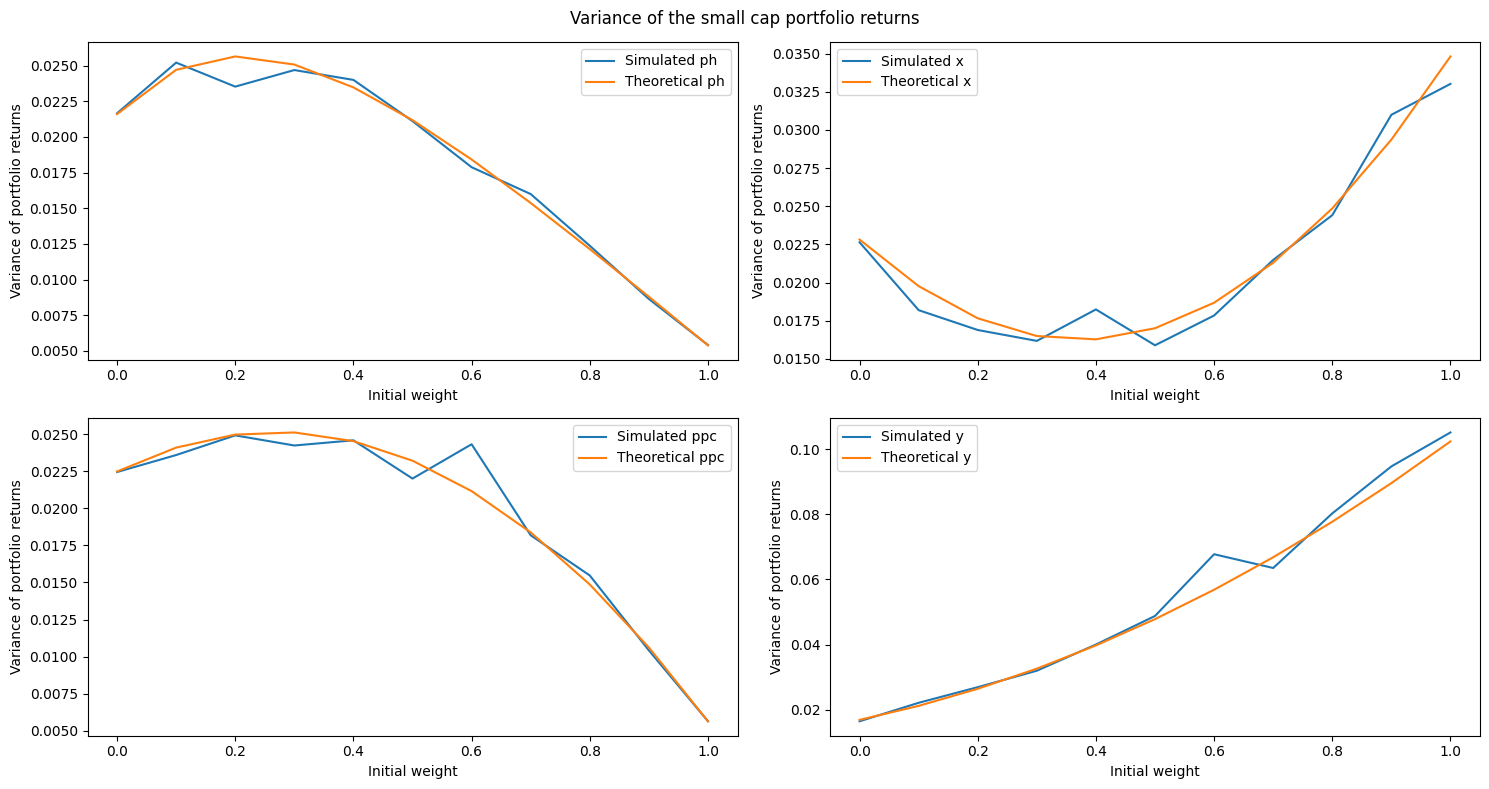

In [46]:
import matplotlib.pyplot as plt

'''
def smallcap_ptf(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance des Small Cap
    E_R_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
    E_R_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
    E_R_sc_ptf_total = (E_R_sc_ptf_correct + E_R_sc_ptf_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf
    
    # Variance des Small Cap
    #Var_X_sc_ptf = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_sc_ptf_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_sc_ptf_total) ** 2)
    Var_R_sc_ptf = ((((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb) ** 2)) - E_R_sc_ptf_total**2)
    Var_R_sc_ptf_N = Var_R_sc_ptf / (N_ptf - n_bigcap)

    # Espérance de l'ajustement
    E_X_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_W_sc = 1 - n_bigcap * (w_bigcap + E_X_ajustement)

    # Variance de l'ajustement
    Var_X_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_X_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_X_ajustement)**2
    Var_W_sc = Var_X_ajustement * n_bigcap

    # Espérance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
    E_R_sc_ptf_adj = E_R_sc_ptf_total * E_W_sc

    # Variance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
    Var_R_sc_ptf_adj = Var_R_sc_ptf_N * E_W_sc**2 + Var_W_sc * E_R_sc_ptf_total**2 + Var_W_sc * Var_R_sc_ptf_N

    return E_R_sc_ptf_adj, Var_R_sc_ptf_adj
'''

ppc=0.6
ph=0.5
rh=1
rb=-2


test_values = np.linspace(0, 1, 11)
rh_values = np.linspace(0, 10, 11)
rb_values = np.linspace(0, -10, 11)

N_indice=100
n_bigcap=1
w_bigcap=0.5
N_ptf=30

x=0.05
y=0.1

variances_theo_sc_ph = []
variances_theo_ptf_ph = []

for ph in test_values:
    variances_theo_sc_ph.append(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    variances_theo_ptf_ph.append(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])

ph = 0.5

variances_theo_sc_ppc = []
variances_theo_ptf_ppc = []

for ppc in test_values:
    variances_theo_sc_ppc.append(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    variances_theo_ptf_ppc.append(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])

ppc = 0.6

variances_theo_sc_x = []
variances_theo_ptf_x = []

for x in test_values:
    variances_theo_sc_x.append(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    variances_theo_ptf_x.append(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])

x = 0.05

variances_theo_sc_y = []
variances_theo_ptf_y = []

for y in test_values:
    variances_theo_sc_y.append(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    variances_theo_ptf_y.append(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])

y = 0.1

variances_theo_sc_rh = []
variances_theo_ptf_rh = []

for rh in test_values:
    variances_theo_sc_rh.append(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    variances_theo_ptf_rh.append(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])

rh = 1

variances_theo_sc_rb = []
variances_theo_ptf_rb = []

for rb in test_values:
    variances_theo_sc_rb.append(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    variances_theo_ptf_rb.append(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1])
    

fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # 2 rows, 3 columns
# Met un titre 
fig.suptitle('Variance of the small cap portfolio returns')

# Plot the first graph
axs[0, 0].plot(test_values, variances_sim_sc_ph, label='Simulated ph')
axs[0, 0].plot(test_values, variances_theo_sc_ph, label='Theoretical ph')
axs[0, 0].set_xlabel('Initial weight')
axs[0, 0].set_ylabel('Variance of portfolio returns')
axs[0, 0].legend()

# Plot the second graph
axs[1, 0].plot(test_values, variances_sim_sc_ppc, label='Simulated ppc')
axs[1, 0].plot(test_values, variances_theo_sc_ppc, label='Theoretical ppc')
axs[1, 0].set_xlabel('Initial weight')
axs[1, 0].set_ylabel('Variance of portfolio returns')
axs[1, 0].legend()

# Plot the third graph
axs[0, 1].plot(test_values, variances_sim_sc_x, label='Simulated x')
axs[0, 1].plot(test_values, variances_theo_sc_x, label='Theoretical x')
axs[0, 1].set_xlabel('Initial weight')
axs[0, 1].set_ylabel('Variance of portfolio returns')
axs[0, 1].legend()

# Plot the fourth graph
axs[1, 1].plot(test_values, variances_sim_sc_y, label='Simulated y')
axs[1, 1].plot(test_values, variances_theo_sc_y, label='Theoretical y')
axs[1, 1].set_xlabel('Initial weight')
axs[1, 1].set_ylabel('Variance of portfolio returns')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


$E_{sc\_ptf\_total} = \left(\frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right) \cdot rh + \left(1 - \frac{ph \cdot ppc}{ph \cdot ppc + (1 - ph) \cdot (1 - ppc)}\right) \cdot rb$

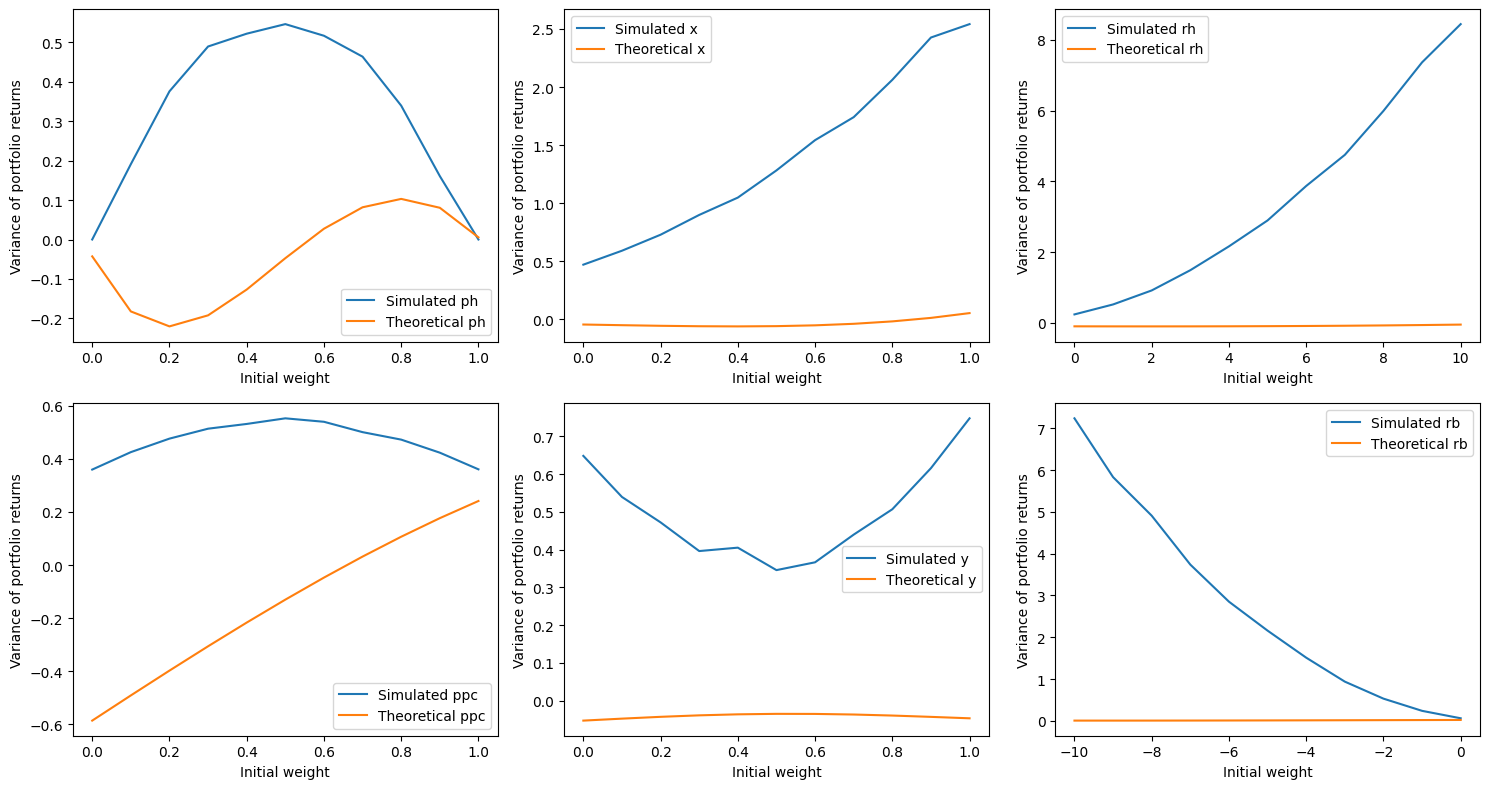

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

# Plot the first graph
axs[0, 0].plot(test_values, variances_sim_ptf_ph, label='Simulated ph')
axs[0, 0].plot(test_values, variances_theo_ptf_ph, label='Theoretical ph')
axs[0, 0].set_xlabel('Initial weight')
axs[0, 0].set_ylabel('Variance of portfolio returns')
axs[0, 0].legend()

# Plot the second graph
axs[1, 0].plot(test_values, variances_sim_ptf_ppc, label='Simulated ppc')
axs[1, 0].plot(test_values, variances_theo_ptf_ppc, label='Theoretical ppc')
axs[1, 0].set_xlabel('Initial weight')
axs[1, 0].set_ylabel('Variance of portfolio returns')
axs[1, 0].legend()

# Plot the third graph
axs[0, 1].plot(test_values, variances_sim_ptf_x, label='Simulated x')
axs[0, 1].plot(test_values, variances_theo_ptf_x, label='Theoretical x')
axs[0, 1].set_xlabel('Initial weight')
axs[0, 1].set_ylabel('Variance of portfolio returns')
axs[0, 1].legend()

# Plot the fourth graph
axs[1, 1].plot(test_values, variances_sim_ptf_y, label='Simulated y')
axs[1, 1].plot(test_values, variances_theo_ptf_y, label='Theoretical y')
axs[1, 1].set_xlabel('Initial weight')
axs[1, 1].set_ylabel('Variance of portfolio returns')
axs[1, 1].legend()

# Plot the fifth graph
axs[0, 2].plot(rh_values, variances_sim_ptf_rh, label='Simulated rh')
axs[0, 2].plot(rh_values, variances_theo_ptf_rh, label='Theoretical rh')
axs[0, 2].set_xlabel('Initial weight')
axs[0, 2].set_ylabel('Variance of portfolio returns')
axs[0, 2].legend()

# Plot the sixth graph
axs[1, 2].plot(rb_values, variances_sim_ptf_rb, label='Simulated rb')
axs[1, 2].plot(rb_values, variances_theo_ptf_rb, label='Theoretical rb')
axs[1, 2].set_xlabel('Initial weight')
axs[1, 2].set_ylabel('Variance of portfolio returns')
axs[1, 2].legend()

plt.tight_layout()
plt.show()

In [163]:
def smallcap_ptf(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance des Small Cap
    E_X_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
    E_X_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
    E_X_sc_ptf_total = (E_X_sc_ptf_correct + E_X_sc_ptf_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf

    # Espérance de l'ajustement
    E_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_r_sc_ptf_adjusted = E_X_sc_ptf_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement))
    
    # Variance des Small Cap
    Var_X_sc_ptf = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_sc_ptf_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_sc_ptf_total) ** 2)
    Var_X_sc_ptf_total = Var_X_sc_ptf / N_ptf

    # Variance de l'ajustement
    Var_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_x_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_x_ajustement)**2

    # Variance ajustée pour les rendements "Small Cap" en prenant en compte l'ajustement de poids
    #Var_r_sc_adjusted = Var_X_sc_ptf_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement))**2 +  Var_x_ajustement * (n_bigcap * (w_bigcap + E_x_ajustement))**2 + Var_x_ajustement * E_X_sc_ptf_total**2 * n_bigcap
    #Var_r_sc_adjusted = Var_X_sc_ptf_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement))**2 + Var_x_ajustement * E_X_sc_ptf_total**2 * n_bigcap**2
    #Var_r_sc_adjusted = Var_X_sc_ptf_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement))**2 + Var_x_ajustement * E_X_sc_ptf_total**2 + E_x_ajustement**2 
    Var_r_sc_adjusted = Var_X_sc_ptf_total * (n_bigcap**2 * (w_bigcap**2 + Var_x_ajustement))

    E_Y = 1 - n_bigcap * (w_bigcap + E_x_ajustement)
    Var_Y = Var_x_ajustement * n_bigcap**2
    Cov_X_Y = E_X_sc_ptf_total * n_bigcap * (w_bigcap + E_x_ajustement) * Var_x_ajustement
    Var_E_r_sc_ptf_adjusted = Var_X_sc_ptf_total * E_Y**2 
    return E_r_sc_ptf_adjusted, Var_E_r_sc_ptf_adjusted


In [46]:
smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1]

0.5230000000000004

Je vais te décrire à nouveau pour que tu cernes peut être comment trouver le calcul de la variance. on a une poche smallcap qui a ce calcul d'espérance : "# Espérance des Small Cap
    E_X_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
    E_X_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
    E_X_sc_ptf_total = (E_X_sc_ptf_correct + E_X_sc_ptf_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf", 

et ce calcul de variance : " # Variance des Small Cap
    Var_X_sc_ptf = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_sc_ptf_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_sc_ptf_total) ** 2)
    Var_X_sc_ptf_total = Var_X_sc_ptf / N_ptf"

Ces deux calculs sont bons. Tu ne dois pas les remettre en question. Ces calculs sont bons pour une expositions de 100% du portefeuille. C'est la que ca se complexifie. On a n_bigcap qui sont pondérés de w_bigcap, et en fonction des prédictions faites sur la hausse ou la baisse des rendements de ces bigcap, on va les surpondérer de x, ou sous pondérer de y. Hors cette ajustement des poids des n_bigcap vient donc plus ou moins empiéter sur l'exposition du portefeuille de la poche smallcap. E_x_ajustement correspond 

La variance du produit de deux variables aléatoires \(A\) et \(B\), notée \( \text{Var}(A \cdot B) \), peut être complexe à calculer directement, car elle dépend non seulement des variances de \(A\) et \(B\) mais aussi de leur covariance. La formule générale pour calculer cette variance est :

$
\text{Var}(A \cdot B) = \text{E}[A^2] \cdot \text{E}[B^2] - (\text{E}[A])^2 \cdot (\text{E}[B])^2 + \text{E}[A]^2 \cdot \text{Var}(B) + \text{E}[B]^2 \cdot \text{Var}(A) - 2 \cdot \text{E}[A] \cdot \text{E}[B] \cdot \text{Cov}(A,B)
$

où :
- \( \text{Var}(X) \) est la variance de \(X\),
- \( \text{E}[X] \) est l'espérance (ou la moyenne) de \(X\),
- \( \text{Cov}(A,B) \) est la covariance entre \(A\) et \(B\).

Cette formule prend en compte à la fois les variances individuelles de \(A\) et \(B\), leur covariance, et les carrés de leurs espérances. Elle montre que la variance du produit n'est pas simplement le produit des variances, surtout lorsque \(A\) et \(B\) sont corrélées.

In [1]:
E_W_sc = 1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y))
E_W_sc_squared = 1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x**2 - (ph * (1 - ppc) + (1 - ph) * ppc) * y**2))
Var_W_sc = E_W_sc_squared - E_W_sc**2


E_R_sc = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
E_R_sc_squared = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh**2 + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb**2
Var_R_sc = E_R_sc_squared - E_R_sc**2
Var_R_sc = Var_R_sc / (N_ptf - n_bigcap)

Cov_R_W = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y))) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb * (1 - n_bigcap * (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))

test1 = Var_R_sc * E_W_sc**2 + Var_W_sc * E_R_sc**2 + Var_W_sc * Var_R_sc
test2 = E_R_sc_squared * E_W_sc_squared - E_R_sc**2 * E_W_sc**2 + Var_R_sc * E_W_sc**2 + Var_W_sc * E_R_sc**2
test3 = E_R_sc_squared * E_W_sc_squared - E_R_sc**2 * E_W_sc**2 + Var_R_sc * E_W_sc**2 + Var_W_sc * E_R_sc**2 + Var_W_sc * Var_R_sc
test4 = E_R_sc_squared * E_W_sc_squared - E_R_sc**2 * E_W_sc**2 + Var_R_sc * E_W_sc**2 + Var_W_sc * E_R_sc**2 - 2 * E_R_sc * E_W_sc * Cov_R_W + Var_W_sc * Var_R_sc
test5 = E_R_sc_squared * E_W_sc_squared - E_R_sc**2 * E_W_sc**2 + Var_R_sc * E_W_sc**2 + Var_W_sc * E_R_sc**2 - 2 * E_R_sc * E_W_sc * Cov_R_W



NameError: name 'n_bigcap' is not defined

In [432]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ppc=0.6
ph=0.5
rh=1
rb=-50

N_indice=100
n_bigcap=5
w_bigcap=0.1
N_ptf=30

x=0.1
y=0.05

n_simulations = 10000
results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

# Conversion des résultats en DataFrame
df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap Portefeuille','SmallCap Portefeuille','BigCap Indice','SmallCap Indice','E_x_total', 'W_sc'])

print("\n Rendements :")

# Affichage des résultats
print("\nMoyenne de rendement de l'indice : ", round(df['Rendement Indice'].mean(), 5))
print("Espérance de rendement de l'indice : ", round(portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[0], 5))

print("\nMoyenne de rendement du big cap indice : ", round(df['BigCap Indice'].mean(), 5))
print("Espérance de rendement du big cap indice : ", round(bigcap(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[0], 5))

print("\nMoyenne de rendement du small cap indice : ", round(df['SmallCap Indice'].mean(), 5))
print("Espérance de rendement du small cap indice : ", round(smallcap_indice(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[0], 5))

print("\nMoyenne de rendement du portefeuille : ", round(df['Rendement Portefeuille'].mean(), 5))
print("Espérance de rendement du portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne de rendement du big cap portefeuille : ", round(df['BigCap Portefeuille'].mean(), 5))
print("Espérance de rendement du big cap portefeuille : ", round(bigcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne de rendement du small cap portefeuille : ", round(df['SmallCap Portefeuille'].mean(), 5))
print("Espérance de rendement du small cap portefeuille : ", round(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne d'ajustement de la simulation : ", round(df['E_x_total'].mean(), 5))
print("Espérance d'ajustement : ", round(ajustement(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 10))

print("\n Variances :")

print("\nMoyenne de variance de l'indice : ", round(df['Rendement Indice'].var(), 5))
print("Variance de rendement de l'indice : ", round(portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[1], 5))

print("\nMoyenne de variance du big cap indice : ", round(df['BigCap Indice'].var(), 5))
print("Variance de rendement du big cap indice : ", round(bigcap(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[1], 5))

print("\nMoyenne de variance du small cap indice : ", round(df['SmallCap Indice'].var(), 5))
print("Variance de rendement du small cap indice : ", round(smallcap_indice(ppc = 1, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[1], 5))

print("\nMoyenne de variance du portefeuille : ", round(df['Rendement Portefeuille'].var(), 5))
print("Variance de rendement du portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance du big cap : ", round(df['BigCap Portefeuille'].var(), 5))
print("Variance de rendement du big cap : ", round(bigcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance du small cap : ", round(df['SmallCap Portefeuille'].var(), 5))
print("Variance de rendement du small cap : ", round(smallcap_ptf(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance d'ajustement : ", round(df['E_x_total'].var(), 5))
print("Variance d'ajustement : ", round(ajustement(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[3], 5))




#print le delta entre chaque
print("\nDelta :")

print("\nDelta rendement : ", round(df['Rendement Portefeuille'].mean() - df['Rendement Indice'].mean(), 5))
print("Delta rendement : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0] - portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[0], 5))

print("\nDelta variance : ", round(df['Rendement Portefeuille'].var() - df['Rendement Indice'].var(), 5))
print("Delta variance : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1] + portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[1], 5))


 Rendements :

Moyenne de rendement de l'indice :  -24.53143
Espérance de rendement de l'indice :  -24.5

Moyenne de rendement du big cap indice :  -12.30559
Espérance de rendement du big cap indice :  -12.25

Moyenne de rendement du small cap indice :  -12.22584
Espérance de rendement du small cap indice :  -12.25

Moyenne de rendement du portefeuille :  -20.73884
Espérance de rendement du portefeuille :  -20.675

Moyenne de rendement du big cap portefeuille :  -13.44836
Espérance de rendement du big cap portefeuille :  -13.4

Moyenne de rendement du small cap portefeuille :  -7.29048
Espérance de rendement du small cap portefeuille :  -7.275

Moyenne d'ajustement de la simulation :  0.12356
Espérance d'ajustement :  0.125

 Variances :

Moyenne de variance de l'indice :  33.08268
Variance de rendement de l'indice :  34.22368

Moyenne de variance du big cap indice :  31.48776
Variance de rendement du big cap indice :  32.5125

Moyenne de variance du small cap indice :  1.68437
Varian

In [441]:
###################################
# Experimentation pour trouver E(YZ)
###################################

# Zone de test
###################################################################

term1 = ph * (ppc * (w_bigcap + x) * (1 - (w_bigcap + x)) + (1 - ppc) * (w_bigcap - y) * (1 - (w_bigcap - y))) * rh * (1 - (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
term2 = (1 - ph) * (ppc * (w_bigcap - y) * (1 - (w_bigcap - y)) + (1 - ppc) * (w_bigcap + x) * (1 - (w_bigcap + x))) * rb * (1 - (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))

test3 = (term1 + term2) * n_bigcap

#########

term1 = ph * (ppc * (w_bigcap + x) * (1 - n_bigcap * (w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)) + (1 - ppc) * (w_bigcap - y) * (1 - n_bigcap * (w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y))) * rh * (1 - (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
term2 = (1 - ph) * (ppc * (w_bigcap - y) * (1 - n_bigcap * (w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)) + (1 - ppc) * (w_bigcap + x) * (1 - n_bigcap * (w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y))) * rb * (1 - (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
test1 = (term1 + term2) * n_bigcap

#########

term1 = ph * (ppc * (w_bigcap + x) * (1 - (w_bigcap  + (ph * ppc + (1 - ph) * (1 - ppc)) * x)) + (1 - ppc) * (w_bigcap - y) * (1 - (w_bigcap - (ph * (1 - ppc) + (1 - ph) * ppc) * y))) * rh
term2 = (1 - ph) * (ppc * (w_bigcap - y) * (1 - (w_bigcap - (ph * (1 - ppc) + (1 - ph) * ppc) * y)) + (1 - ppc) * (w_bigcap + x) * (1 - (w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x))) * rb
test2 = (term1 + term2) * n_bigcap

#########

term1 = ph * (ppc * (w_bigcap + x) * (1 - n_bigcap * (w_bigcap + x)) + (1 - ppc) * (w_bigcap - y) * (1 - n_bigcap * (w_bigcap - y))) * rh * (1 - (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
term2 = (1 - ph) * (ppc * (w_bigcap - y) * (1 - n_bigcap * (w_bigcap - y)) + (1 - ppc) * (w_bigcap + x) * (1 - n_bigcap * (w_bigcap + x))) * rb * (1 - (w_bigcap + ((ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)))
test4 = (term1 + term2) * n_bigcap

#########

term1 = ph * ppc * (w_bigcap + x) * (1 - (w_bigcap + x)) * rh
term2 = ph * (1 - ppc) * (w_bigcap - y) * (1 - (w_bigcap - y)) * rh 
term3 = (1 - ph) * ppc * (w_bigcap - y) * (1 - (w_bigcap - y)) * rb
term4 = (1 - ph) * (1 - ppc) * (w_bigcap + x) * (1 - (w_bigcap + x)) * rb

test5 = (term1 + term2 + term3 + term4) * n_bigcap #* (1 - W_sc)

##############

term1 = ph**n_bigcap * ppc**n_bigcap * (w_bigcap + x) * (1 - (w_bigcap + x)) * rh**n_bigcap
term2 = ph**n_bigcap * (1 - ppc)**n_bigcap * (w_bigcap - y) * (1 - (w_bigcap - y)) * rh **n_bigcap
term3 = (1 - ph)**n_bigcap * ppc**n_bigcap * (w_bigcap - y) * (1 - (w_bigcap - y)) * rb**n_bigcap
term4 = (1 - ph)**n_bigcap * (1 - ppc)**n_bigcap * (w_bigcap + x) * (1 - (w_bigcap + x)) * rb**n_bigcap

testexp = (term1 + term2 + term3 + term4) * n_bigcap #* (1 - W_sc)

##########

term1 = ph * ppc * (w_bigcap + x) * rh * (1 - W_bc_rh_x)
term2 = ph * (1 - ppc) * (w_bigcap - y) * rh  * (1 - W_bc_rh_y)
term3 = (1 - ph) * ppc * (w_bigcap - y) * rb * (1 - W_bc_rb_x)
term4 = (1 - ph) * (1 - ppc) * (w_bigcap + x) * rb * (1 - W_bc_rb_y)

test7 = (term1 + term2 + term3 + term4) * n_bigcap# * (1 - n_bigcap * W_bc)

######### SAVE, SEEMS TO BE WORKING, OR AT LEAST ITS CLOSE

W_sc = 1 - n_bigcap * (w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)
W_bc = w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y

W_bc_rh = w_bigcap + (ph * ppc) * x - (ph * (1 - ppc)) * y
W_bc_rb = w_bigcap + ((1 - ph) * (1 - ppc)) * x - ((1 - ph) * ppc) * y

W_bc_rh_x = w_bigcap + (ph * ppc) * x
W_bc_rh_y = w_bigcap - (ph * (1 - ppc)) * y
W_bc_rb_x = w_bigcap + ((1 - ph) * (1 - ppc)) * x 
W_bc_rb_y = w_bigcap - ((1 - ph) * ppc) * y

"""term1 = ph * ppc * (w_bigcap + x) * rh * (1 - W_bc_rh)
term2 = ph * (1 - ppc) * (w_bigcap - y) * rh  * (1 - W_bc_rh)
term3 = (1 - ph) * ppc * (w_bigcap - y) * rb * (1 - W_bc_rb)
term4 = (1 - ph) * (1 - ppc) * (w_bigcap + x) * rb * (1 - W_bc_rb)"""

term1 = ph * ppc * (w_bigcap + x) * rh * (1 - W_bc_rh_x) #* (1 - W_bc_rh)
term2 = ph * (1 - ppc) * (w_bigcap - y) * rh  * (1 - W_bc_rh_y) #* (1 - W_bc_rh)
term3 = (1 - ph) * ppc * (w_bigcap - y) * rb * (1 - W_bc_rb_x) #* (1 - W_bc_rb)
term4 = (1 - ph) * (1 - ppc) * (w_bigcap + x) * rb * (1 - W_bc_rb_y) #* (1 - W_bc_rb)

testsave = (term1 + term2 + term3 + term4) * n_bigcap * (1 - n_bigcap * W_bc)

#############################

W_sc = 1 - n_bigcap * (w_bigcap + (ph 

* ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y)
W_bc = w_bigcap + (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y

W_bc_rh = w_bigcap + (ph * ppc) * x - (ph * (1 - ppc)) * y
W_bc_rb = w_bigcap + ((1 - ph) * (1 - ppc)) * x - ((1 - ph) * ppc) * y

'''W_bc_rh_x = w_bigcap + ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * x
W_bc_rh_y = w_bigcap - (ph * (1 - ppc)/(ph * (1 - ppc) + (1 - ph) * ppc)) * y
W_bc_rb_x = w_bigcap + ((1 - ph) * (1 - ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * x 
W_bc_rb_y = w_bigcap - (((1 - ph) * ppc)/(ph * (1 - ppc) + (1 - ph) * ppc)) * y'''

W_bc_rh_x = w_bigcap + (ph * ppc) * x
W_bc_rh_y = w_bigcap - (ph * (1 - ppc)) * y
W_bc_rb_x = w_bigcap + ((1 - ph) * (1 - ppc)) * x 
W_bc_rb_y = w_bigcap - ((1 - ph) * ppc) * y


"""term1 = ph * ppc * (w_bigcap + x) * rh * (1 - W_bc_rh)
term2 = ph * (1 - ppc) * (w_bigcap - y) * rh  * (1 - W_bc_rh)
term3 = (1 - ph) * ppc * (w_bigcap - y) * rb * (1 - W_bc_rb)
term4 = (1 - ph) * (1 - ppc) * (w_bigcap + x) * rb * (1 - W_bc_rb)"""

term1 = ph * ppc * (w_bigcap + x) * rh * (1 - W_bc_rh_x) #* (1 - W_bc_rh)
term2 = ph * (1 - ppc) * (w_bigcap - y) * rh  * (1 - W_bc_rh_y) #* (1 - W_bc_rh)
term3 = (1 - ph) * ppc * (w_bigcap - y) * rb * (1 - W_bc_rb_x) #* (1 - W_bc_rb)
term4 = (1 - ph) * (1 - ppc) * (w_bigcap + x) * rb * (1 - W_bc_rb_y) #* (1 - W_bc_rb)

test6 = (term1 + term2 + term3 + term4) * n_bigcap #* (1 - n_bigcap * W_bc)

result = testexp

print("W_bc_simple", (1 - n_bigcap * W_bc) ," W_bc_rh", W_bc_rh, "W_bc_rb", W_bc_rb, "W_bc_rh_x", W_bc_rh_x, "W_bc_rh_y", W_bc_rh_y, "W_bc_rb_x", W_bc_rb_x, "W_bc_rb_y", W_bc_rb_y)
###################################################################

print("Terme 1 et 2 : ", term1, term2)

print("\nEspérance simulée de Y*Z : ", (df['BigCap Portefeuille'] * df['W_sc']).mean())
print("Espérance théorique naïve de Y*Z : ", test5)
print("Espérance théorique de Y*Z : ", result)


E_R_sc_ptf_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
E_R_sc_ptf_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
E_R_sc_ptf_total = (E_R_sc_ptf_correct + E_R_sc_ptf_incorrect)

E_R_bc_correct = ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y)) * rh  # Correct prediction outcomes
E_R_bc_incorrect = (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x)) * rb  # Incorrect prediction outcomes
E_R_bc = (E_R_bc_correct + E_R_bc_incorrect)
E_R_bc_total = E_R_bc * n_bigcap

covariance = (E_R_sc_ptf_total * result) - df['SmallCap Portefeuille'].mean() * df['BigCap Portefeuille'].mean()

print("\nVariance globale simulée : ", df['Rendement Portefeuille'].var())
print("Variance globale théorique : ", df['BigCap Portefeuille'].var() + df['SmallCap Portefeuille'].var() + 2 * covariance)

print("\nCovariance simulée : ", df['BigCap Portefeuille'].cov(df['SmallCap Portefeuille']))
print("Covariance théorique : ", covariance)

W_bc_simple 0.3749999999999999  W_bc_rh 0.12 W_bc_rb 0.10500000000000001 W_bc_rh_x 0.13 W_bc_rh_y 0.09 W_bc_rb_x 0.12000000000000001 W_bc_rb_y 0.085
Terme 1 et 2 :  0.052199999999999996 0.009100000000000002

Espérance simulée de Y*Z :  -4.614912749999999
Espérance théorique naïve de Y*Z :  -11.275000000000002
Espérance théorique de Y*Z :  -260351.56048000001

Variance globale simulée :  69.27495595376813
Variance globale théorique :  10101530.78609377

Covariance simulée :  -8.527280727920797
Covariance théorique :  5050722.22828818


In [416]:
digit = 5

print("                E(YZ) : ", round((df['BigCap Portefeuille'] * df['W_sc']).mean(), digit), round(result, digit))

print("\n   E(XYZ) = E(X)E(YZ) : ", round(df['SmallCap Portefeuille'].mean()/df['W_sc'].mean() * (df['BigCap Portefeuille'] * df['W_sc']).mean(), digit), round(E_R_sc_ptf_total * result, digit))

print("\n         E(X)E(Y)E(Z) : ", round(df['SmallCap Portefeuille'].mean() * df['BigCap Portefeuille'].mean(), digit), round(E_R_sc_ptf_total * W_sc * E_R_bc_total, digit))

print("\nCovariance :\nE(XYZ) - E(X)E(Y)E(Z) : ", round((df['SmallCap Portefeuille'].mean()/df['W_sc'].mean() * (df['BigCap Portefeuille'] * df['W_sc']).mean()) - df['SmallCap Portefeuille'].mean() * df['BigCap Portefeuille'].mean(),digit), round(E_R_sc_ptf_total * result - E_R_sc_ptf_total * W_sc * E_R_bc_total, digit))

                E(YZ) :  0.01889 0.02156

   E(XYZ) = E(X)E(YZ) :  0.00382 0.00431

         E(X)E(Y)E(Z) :  0.00564 0.00562

Covariance :
E(XYZ) - E(X)E(Y)E(Z) :  -0.00182 -0.00131
